In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [3]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [4]:
# read csvs & build dataframe
df = pd.DataFrame()
df_temp = pd.read_csv('./datasets/temperatura_featured.csv')
df_vendas = pd.read_csv('./datasets/vendas.csv', ';')
df_conc = pd.read_csv('./datasets/concorrentes.csv', ';')

In [5]:
# pre-processing
def get_dias_fechados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-11-02', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-04-19', '2019-11-02', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_fds():
    return ['Sunday', 'Saturday']

def get_dias_feriados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-04-21', '2018-04-30', '2018-05-01', '2018-05-31', '2018-06-01', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-16', '2018-12-24', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', 
'2019-01-01', '2019-03-04', '2019-03-05', '2019-04-19', '2019-04-21', '2019-05-01', '2019-06-20', '2019-06-21', '2019-09-07', '2019-10-12', '2019-11-02', '2019-11-15', '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-30', '2019-12-31', 
'2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_festivos():
    return ['2018-02-12', '2018-02-13', '2018-05-13', '2018-08-12', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-05-12', '2019-08-11', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_vesperas_dias_festivos():
    vesperas = []
    for i in range(len(get_dias_festivos())):
        vesperas_dia_festivo_current = pd.Series(pd.date_range(end=get_dias_festivos()[i], periods=5, closed='left'))
        for j in range(len(vesperas_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (vesperas_dia_festivo_current[j] != get_dias_festivos()[o]):
                    vesperas.append(vesperas_dia_festivo_current[j])
    return vesperas

def get_pos_dias_festivos():
    pos = []
    for i in range(len(get_dias_festivos())):
        pos_dia_festivo_current = pd.Series(pd.date_range(get_dias_festivos()[i], periods=3, closed='right'))
        for j in range(len(pos_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (pos_dia_festivo_current[j] != get_dias_festivos()[o]):
                    pos.append(pos_dia_festivo_current[j])
    return pos

def get_dias_acerca_pagamento():
    return [5,6,7,8,9,10,28,29,30,31]

def get_meses_baixas_temporadas():
    return [1, 2]

def get_trimestres_indicadores(series, indicator, period):
    val = []
    trimestres_template = df_vendas.groupby(pd.to_datetime(df_vendas['DATA']).dt.to_period(period))['VENDAS'].agg(indicator)
    for i in range(len(series)):
        val.append(trimestres_template[series[i]].astype(int))
    return val

# preprocessing
df.insert(loc=0, column='DATA', value=(pd.to_datetime(df_vendas['DATA'], dayfirst=True)))
df.insert(loc=1, column='VENDAS', value=(df_vendas['VENDAS'].fillna(0).astype(int)))
df.insert(loc=2, column='FECHADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=3, column='ABERTO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=4, column='FDS', value=(pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=5, column='DS', value=(~pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=6, column='DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())).astype(int))
df.insert(loc=7, column='VESPERA_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())).astype(int))
df.insert(loc=8, column='POS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos())).astype(int))
df.insert(loc=9, column='DATA_NAO_FESTIVA', value=((~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos()))).astype(int))
df.insert(loc=10, column='FERIADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=11, column='NAO_FERIADO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=12, column='SEMANA_PAGAMENTO', value=(pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=13, column='SEMANA_DE_NAO_PAGAMENTO', value=(~pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=14, column='BAIXA_TEMPORADA', value=(pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=15, column='ALTA_TEMPORADA', value=(~pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=16, column='QTD_CONCORRENTES', value=(df_conc['CONCORRENTES'].fillna(0).astype(int)))
df.insert(loc=17, column='PRECIPITACAO', value=(df_temp['PRECIPITACAO']))
df.insert(loc=18, column='TEMPERATURA', value=(df_temp['TEMPERATURA']))
df.insert(loc=19, column='UMIDADE', value=(df_temp['UMIDADE']))
df.insert(loc=20, column='VENDAS_MEDIA_TRIM', value=(get_trimestres_indicadores(pd.to_datetime(df_vendas['DATA']).dt.to_period('Q').astype(str), 'mean', 'Q')))
df.insert(loc=21, column='VENDAS_MEDIA_MES', value=(get_trimestres_indicadores(pd.to_datetime(df_vendas['DATA']).dt.to_period('M').astype(str), 'mean', 'M')))
df.insert(loc=22, column='VENDAS_STD_TRIM', value=(get_trimestres_indicadores(pd.to_datetime(df_vendas['DATA']).dt.to_period('Q').astype(str), 'std', 'Q')))
df.insert(loc=23, column='VENDAS_STD_MES', value=(get_trimestres_indicadores(pd.to_datetime(df_vendas['DATA']).dt.to_period('M').astype(str), 'std', 'M')))

# removing outliers
df = df.query('FECHADO == 0 and ABERTO == 1')
df = df.drop(columns=['FECHADO', 'ABERTO'])
df = df.query('VENDAS < 200')

# pd.set_option('display.max_rows', 50)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 751
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATA                     723 non-null    datetime64[ns]
 1   VENDAS                   723 non-null    int64         
 2   FDS                      723 non-null    int64         
 3   DS                       723 non-null    int64         
 4   DATA_FESTIVA             723 non-null    int64         
 5   VESPERA_DATA_FESTIVA     723 non-null    int64         
 6   POS_DATA_FESTIVA         723 non-null    int64         
 7   DATA_NAO_FESTIVA         723 non-null    int64         
 8   FERIADO                  723 non-null    int64         
 9   NAO_FERIADO              723 non-null    int64         
 10  SEMANA_PAGAMENTO         723 non-null    int64         
 11  SEMANA_DE_NAO_PAGAMENTO  723 non-null    int64         
 12  BAIXA_TEMPORADA          723 non-nul

In [60]:
df

,DATA,VENDAS,FDS,DS,DATA_FESTIVA,VESPERA_DATA_FESTIVA,POS_DATA_FESTIVA,DATA_NAO_FESTIVA,FERIADO,NAO_FERIADO,...,BAIXA_TEMPORADA,ALTA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE,VENDAS_MEDIA_TRIM,VENDAS_MEDIA_MES,VENDAS_STD_TRIM,VENDAS_STD_MES
0,2018-02-14,132,0,1,0,0,1,0,0,1,...,1,0,7,0.0,28.0,66.75,136,137,38,41
1,2018-02-15,149,0,1,0,0,1,0,0,1,...,1,0,7,0.0,28.6,61.50,136,137,38,41
2,2018-02-16,130,0,1,0,0,0,1,0,1,...,1,0,7,0.0,30.6,65.25,136,137,38,41
3,2018-02-17,174,1,0,0,0,0,1,0,1,...,1,0,7,0.0,31.5,65.75,136,137,38,41
4,2018-02-18,185,1,0,0,0,0,1,0,1,...,1,0,7,0.0,33.4,58.50,136,137,38,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2020-03-02,99,0,1,0,0,0,1,0,1,...,0,1,13,0.0,29.2,66.00,100,92,32,36
748,2020-03-03,70,0,1,0,0,0,1,0,1,...,0,1,13,0.0,30.0,70.00,100,90,32,32
749,2020-03-04,98,0,1,0,0,0,1,0,1,...,0,1,13,0.0,29.7,67.00,96,93,21,26
750,2020-03-05,121,0,1,0,0,0,1,0,1,...,0,1,13,0.0,28.8,67.00,96,92,21,25


In [7]:
df.describe()

,VENDAS,FDS,DS,DATA_FESTIVA,VESPERA_DATA_FESTIVA,POS_DATA_FESTIVA,DATA_NAO_FESTIVA,FERIADO,NAO_FERIADO,SEMANA_PAGAMENTO,...,BAIXA_TEMPORADA,ALTA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE,VENDAS_MEDIA_TRIM,VENDAS_MEDIA_MES,VENDAS_STD_TRIM,VENDAS_STD_MES
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,...,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,126.262794,0.280775,0.719225,0.004149,0.042877,0.030429,0.928077,0.022130,0.977870,0.304288,...,0.177040,0.822960,10.051176,4.066943,26.126003,75.878631,123.878285,123.882434,29.533887,28.167358
std,24.015694,0.449689,0.449689,0.064326,0.202720,0.171883,0.258538,0.147208,0.147208,0.460424,...,0.381967,0.381967,1.179879,9.931796,5.761037,10.512370,10.902190,11.941281,7.546708,10.292990
min,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,0.000000,10.900000,48.750000,96.000000,90.000000,21.000000,4.000000
25%,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,10.000000,0.000000,22.200000,68.000000,118.000000,117.000000,23.000000,21.000000
50%,128.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,10.000000,0.000000,26.600000,75.750000,122.000000,122.000000,26.000000,26.000000
75%,140.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,11.000000,2.250000,30.100000,83.500000,134.000000,134.000000,35.000000,31.000000
max,196.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,13.000000,79.400000,39.000000,97.000000,137.000000,144.000000,46.000000,68.000000


In [8]:
df.median()

VENDAS                     128.00
FDS                          0.00
DS                           1.00
DATA_FESTIVA                 0.00
VESPERA_DATA_FESTIVA         0.00
POS_DATA_FESTIVA             0.00
DATA_NAO_FESTIVA             1.00
FERIADO                      0.00
NAO_FERIADO                  1.00
SEMANA_PAGAMENTO             0.00
SEMANA_DE_NAO_PAGAMENTO      1.00
BAIXA_TEMPORADA              0.00
ALTA_TEMPORADA               1.00
QTD_CONCORRENTES            10.00
PRECIPITACAO                 0.00
TEMPERATURA                 26.60
UMIDADE                     75.75
VENDAS_MEDIA_TRIM          122.00
VENDAS_MEDIA_MES           122.00
VENDAS_STD_TRIM             26.00
VENDAS_STD_MES              26.00
dtype: float64

In [9]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


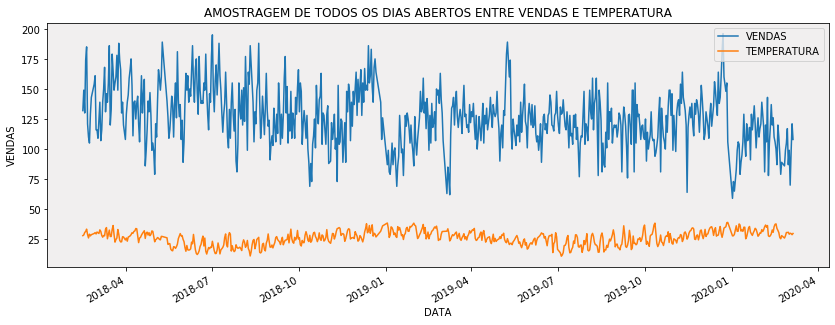

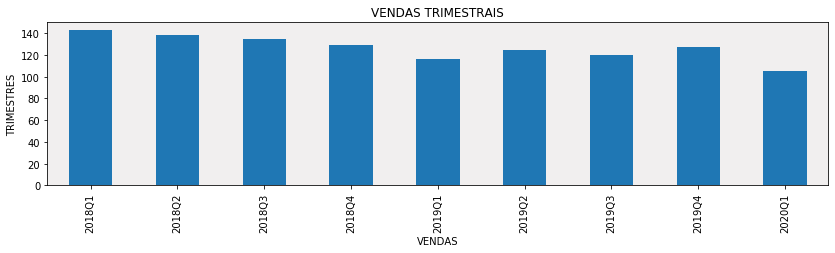

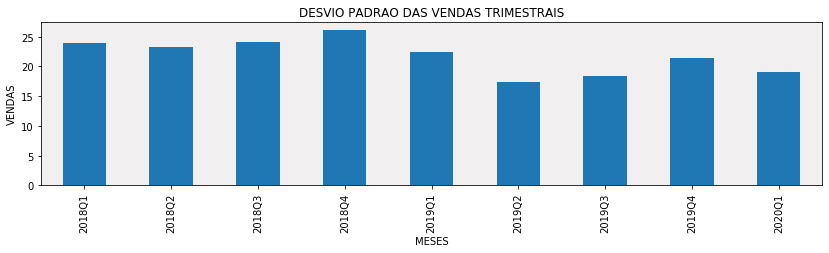

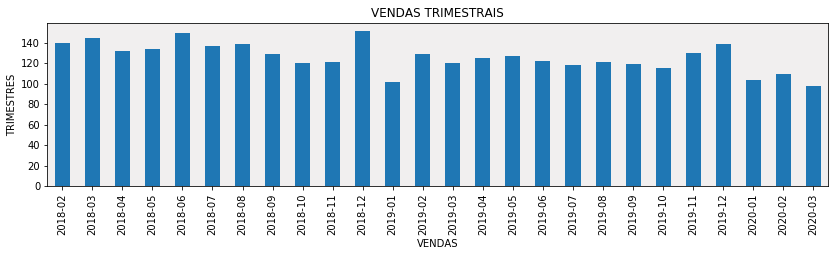

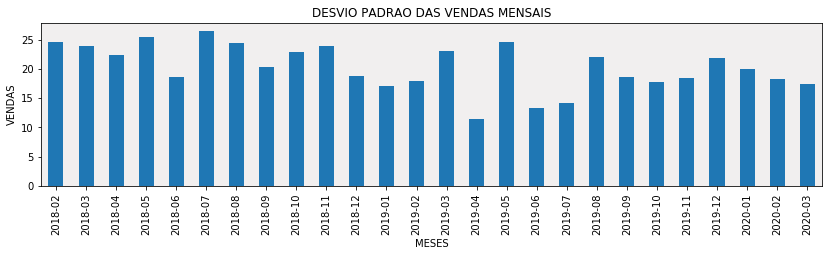

In [10]:
import matplotlib.style as style
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = '#F1EFEF'

ax = df.plot(y=['VENDAS', 'TEMPERATURA'], x='DATA', figsize=(14, 5))
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS OS DIAS ABERTOS ENTRE VENDAS E TEMPERATURA')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()    

df_quarter = pd.DataFrame({'DATA': pd.to_datetime(df['DATA']), 'TEMPERATURA': df['TEMPERATURA'], 'VENDAS': df['VENDAS']})

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS TRIMESTRAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()

ax = df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

mm = df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS MENSAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()


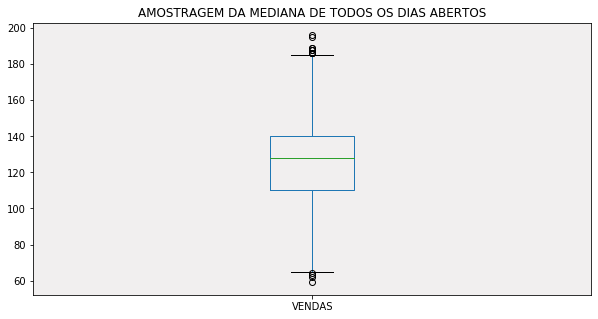

In [11]:
plt.rcParams['axes.facecolor'] = '#F1EFEF'
df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='box')
plt.title('AMOSTRAGEM DA MEDIANA DE TODOS OS DIAS ABERTOS')
plt.show()

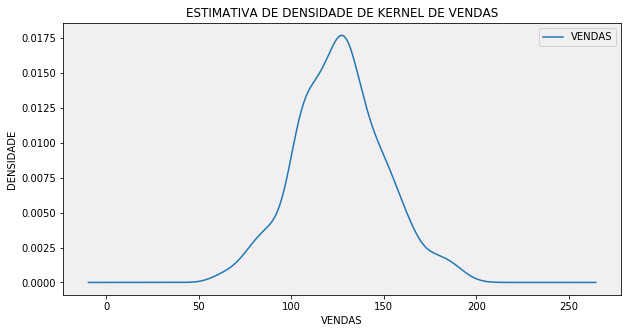

In [12]:
plt.rcParams['axes.facecolor'] = '#F1EFEF'
df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='kde')
plt.legend(loc=1)
plt.title('ESTIMATIVA DE DENSIDADE DE KERNEL DE VENDAS')
plt.xlabel('VENDAS')
plt.ylabel('DENSIDADE')
plt.show()

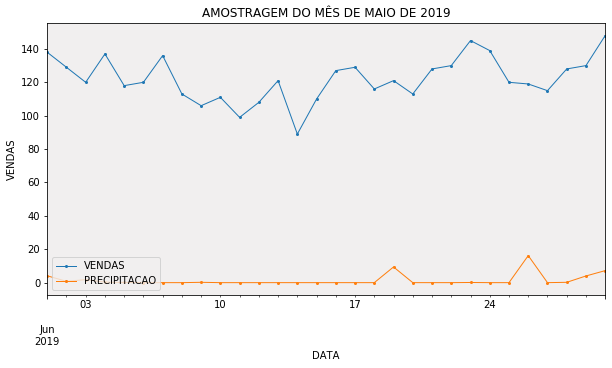

In [13]:
plt.rcParams['axes.facecolor'] = '#F1EFEF'
query = (df['DATA'] >= "2019-06-01") & (df['DATA'] <= "2019-06-30")
df2 = df.loc[query]
df2.sort_values(by=['DATA'], inplace=True, ascending=True)
df2.plot(y=['VENDAS', 'PRECIPITACAO'], x='DATA', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.legend(loc=3)
plt.title('AMOSTRAGEM DO MÊS DE MAIO DE 2019')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS', 'SEMANA_DE_NAO_PAGAMENTO', 'SEMANA_PAGAMENTO', 'FERIADO'])
y = df.drop(columns=['DATA', 'FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'FERIADO', 'NAO_FERIADO', 'SEMANA_PAGAMENTO', 'SEMANA_DE_NAO_PAGAMENTO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE', 'VENDAS_MEDIA_TRIM', 'VENDAS_MEDIA_MES', 'VENDAS_STD_TRIM', 'VENDAS_STD_MES'])

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)
y_train = np.array(y_train)
y_test = np.array(y_test)

#feature scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

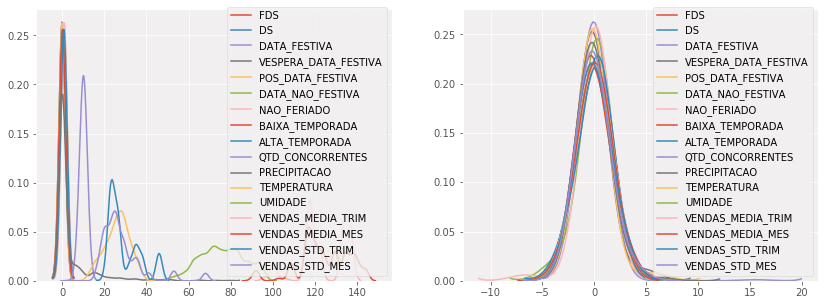

In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#F1EFEF'

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=['FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'NAO_FERIADO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE', 'VENDAS_MEDIA_TRIM', 'VENDAS_MEDIA_MES', 'VENDAS_STD_TRIM', 'VENDAS_STD_MES'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

sns.kdeplot(df['FDS'], bw=1.5, ax=ax1)
sns.kdeplot(df['DS'], bw=1.5, ax=ax1)
sns.kdeplot(df['DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['VESPERA_DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['POS_DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['DATA_NAO_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['NAO_FERIADO'], bw=1.5, ax=ax1)
sns.kdeplot(df['BAIXA_TEMPORADA'], bw=1.5, ax=ax1)
sns.kdeplot(df['ALTA_TEMPORADA'], bw=1.5, ax=ax1)
sns.kdeplot(df['QTD_CONCORRENTES'], bw=1.5, ax=ax1)
sns.kdeplot(df['PRECIPITACAO'], bw=1.5, ax=ax1)
sns.kdeplot(df['TEMPERATURA'], bw=1.5, ax=ax1)
sns.kdeplot(df['UMIDADE'], bw=1.5, ax=ax1)
sns.kdeplot(df['VENDAS_MEDIA_TRIM'], bw=1.5, ax=ax1)
sns.kdeplot(df['VENDAS_MEDIA_MES'], bw=1.5, ax=ax1)
sns.kdeplot(df['VENDAS_STD_TRIM'], bw=1.5, ax=ax1)
sns.kdeplot(df['VENDAS_STD_MES'], bw=1.5, ax=ax1)

sns.kdeplot(scaled_df['FDS'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DS'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['VESPERA_DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['POS_DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DATA_NAO_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['NAO_FERIADO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['BAIXA_TEMPORADA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['ALTA_TEMPORADA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['QTD_CONCORRENTES'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['PRECIPITACAO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['TEMPERATURA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['UMIDADE'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['VENDAS_MEDIA_TRIM'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['VENDAS_MEDIA_MES'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['VENDAS_STD_TRIM'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['VENDAS_STD_MES'], bw=1.5, ax=ax2)

plt.show()


In [16]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

RMSE (cross validation): 23.715913537343095


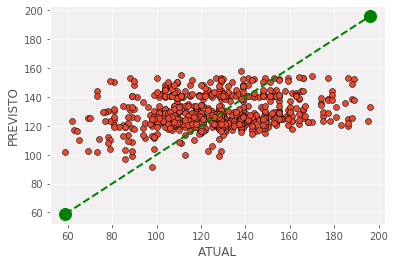

RMSE: 18.903953500415444


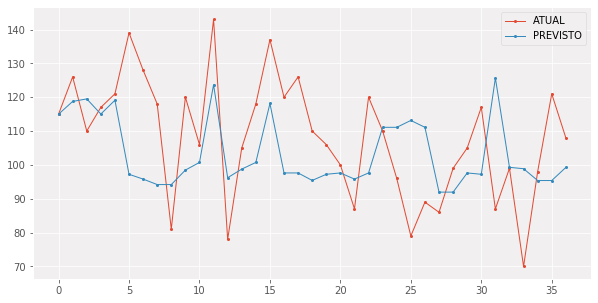

Weight,Feature
0.6042 ± 0.5381,VENDAS_MEDIA_MES
0.0472 ± 0.1174,POS_DATA_FESTIVA
0.0159 ± 0.0263,TEMPERATURA
0.0154 ± 0.0066,FDS
0.0101 ± 0.0627,PRECIPITACAO
0.0063 ± 0.0284,VENDAS_STD_MES
0 ± 0.0000,QTD_CONCORRENTES
0 ± 0.0000,NAO_FERIADO
0 ± 0.0000,DATA_FESTIVA
0 ± 0.0000,DS


In [43]:
# imports
from sklearn.ensemble import GradientBoostingRegressor
plt.rcParams['axes.facecolor'] = '#F1EFEF'

# model
gb = GradientBoostingRegressor(alpha=0.9, ccp_alpha=1.7, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls',
                          max_depth=350, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=12,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
# cross validation
scores = cross_val_score(gb, X, y, scoring='neg_mean_squared_error', cv=5)
predicted = cross_val_predict(gb, X, y, cv=5)
print(f'RMSE (cross validation): {np.sqrt(np.abs(scores)).mean()}')

# plot
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'go--', linewidth=2, markersize=12)
ax.set_xlabel('ATUAL')
ax.set_ylabel('PREVISTO')
plt.show()

# manual training
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f'RMSE: {metrics.mean_squared_error(y_test, y_pred, squared=False)}')

# plot
df_comparison = pd.DataFrame({'ATUAL': pd.DataFrame(y_test).values.flatten(), 'PREVISTO': y_pred.flatten()})
df_comparison.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# permutation
perm = PermutationImportance(gb, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.values.tolist())

RMSE (cross validation): 21.412504075814915


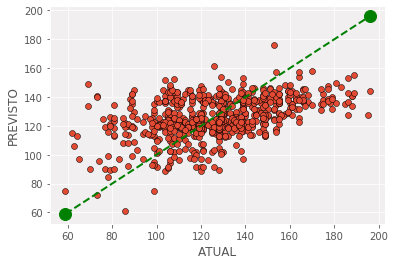

RMSE: 21.992473135719415


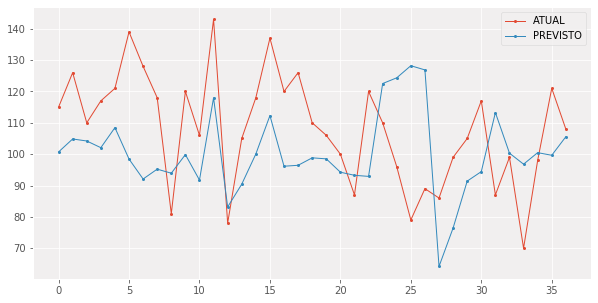

Weight,Feature
0.6593 ± 0.3087,VENDAS_MEDIA_MES
0.0896 ± 0.2041,POS_DATA_FESTIVA
0.0729 ± 0.1698,QTD_CONCORRENTES
0.0080 ± 0.0177,VENDAS_STD_TRIM
0.0029 ± 0.0398,VENDAS_MEDIA_TRIM
0 ± 0.0000,DATA_FESTIVA
0 ± 0.0000,NAO_FERIADO
-0.0029 ± 0.0441,VENDAS_STD_MES
-0.0061 ± 0.0147,BAIXA_TEMPORADA
-0.0099 ± 0.0085,FDS


In [59]:
# imports 
from sklearn.neural_network import MLPRegressor
plt.rcParams['axes.facecolor'] = '#F1EFEF'

# model
nn = MLPRegressor(activation='identity', alpha=0.002, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=800,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=3, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# cross validation
scores = cross_val_score(nn, X, y, scoring='neg_mean_squared_error', cv=5)
predicted = cross_val_predict(nn, X, y, cv=5)
print(f'RMSE (cross validation): {np.sqrt(np.abs(scores)).mean()}')

# plot
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'go--', linewidth=2, markersize=12)
ax.set_xlabel('ATUAL')
ax.set_ylabel('PREVISTO')
plt.show()

# manual training
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print(f'RMSE: {metrics.mean_squared_error(y_test, y_pred, squared=False)}')

# plot
df1 = pd.DataFrame({'ATUAL': pd.DataFrame(y_test).values.flatten(), 'PREVISTO': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# permutation
perm = PermutationImportance(nn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.values.tolist())

Epoch 1/100
10/10 [==============================] - 0s 44ms/step - loss: 16763.2480 - val_loss: 12025.5352
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 16723.3398 - val_loss: 12011.0557
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 16686.8555 - val_loss: 11987.1152
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 16643.4648 - val_loss: 11953.9355
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 16583.3945 - val_loss: 11909.7090
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 16508.4941 - val_loss: 11850.3916
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 16400.8535 - val_loss: 11771.7969
Epoch 8/100
10/10 [==============================] - 0s 10ms/step - loss: 16257.1924 - val_loss: 11667.7842
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 16072.8486 - val_loss: 11533.6719
Epoch 10/100
10/10 [========

10/10 [==============================] - 0s 11ms/step - loss: 555.3161 - val_loss: 414.1949
Epoch 78/100
10/10 [==============================] - 0s 10ms/step - loss: 539.4642 - val_loss: 402.5515
Epoch 79/100
10/10 [==============================] - 0s 11ms/step - loss: 526.0082 - val_loss: 391.7356
Epoch 80/100
10/10 [==============================] - 0s 11ms/step - loss: 555.7298 - val_loss: 381.4088
Epoch 81/100
10/10 [==============================] - 0s 11ms/step - loss: 549.3745 - val_loss: 372.1754
Epoch 82/100
10/10 [==============================] - 0s 11ms/step - loss: 554.1353 - val_loss: 363.6497
Epoch 83/100
10/10 [==============================] - 0s 10ms/step - loss: 505.7103 - val_loss: 356.4859
Epoch 84/100
10/10 [==============================] - 0s 10ms/step - loss: 514.6237 - val_loss: 349.9366
Epoch 85/100
10/10 [==============================] - 0s 10ms/step - loss: 510.8167 - val_loss: 343.7386
Epoch 86/100
10/10 [==============================] - 0s 10ms/step -

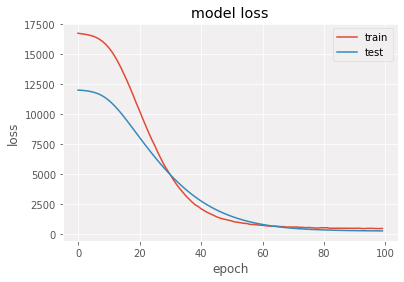

RMSE: 7.650


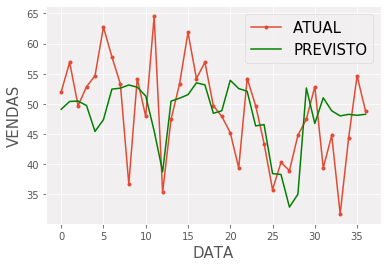

In [24]:
# imports
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## Deep-learing imports
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

plt.rcParams['axes.facecolor'] = '#F1EFEF'

# reshape input to be 3D as expected by LSTMs [samples, timesteps, features].
train_X = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
test_X = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
train_y = y_train.reshape((pd.DataFrame(y_train).shape[0], -1))
test_y = y_test.reshape((pd.DataFrame(y_test).shape[0], -1))

# create model
model = Sequential()
model.add(LSTM(600, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=70, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], train_X.shape[2]))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -16:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -16:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print('RMSE: %.3f' % rmse)

# plot
aa=[x for x in range(inv_yhat.size)]
plt.plot(aa, inv_y, marker='.', label="ATUAL")
plt.plot(aa, inv_yhat, 'r', color='green', label="PREVISTO")
plt.ylabel('VENDAS', size=15)
plt.xlabel('DATA', size=15)
plt.legend(fontsize=15)
plt.show()



In [ ]:
# # TCC Talk

# # Roteiro
# # - Falar do EDA
# # - Falar do onehotencoding
# # - Falar do permutation importance (feature selection)
# # - Falar do Randomized Search
# # - Mostrar o excel comparativo

# # Perguntas
# # - Sabe por que o meu correlation nao está funcionando?
# # - O que sugeriria de proximo passo?
# # - Alguma sugestão de como aumentar a perfomance?


# —

# # passar para %
# # -> RMSE / (maximo de vendas - minimo de vendas)
# # -> to divindo a "media" entre todos os valores que dataset abrange (abrangencia do dataset)
# # -> (18.90 / (196-59))*100 = 13% 
# # google: como medir % em escala 

# # Pegar o melhor do Cross Validation ao invés da media

# # O que estou fazendo é para o contexto única e exclusivamente do meu pai e para este cenário, isso que eu fiz é o melhor - eu descobri que esses são os melhores parâmetros e essas as melhores divisões de teste e treino

# # outliers são um percentual de dados baixo 
# - Foi considerado outliers os dados que constavam em frequencia menor do que 3%
# - Tudo o que tem menos de x registros, foi removido
# - Fazer pra menos também

# # tentar entender mais o scatter

# # mostrar que eu criei um protocolo
# - Quais técnicas pra escolher algoritmos
# - Quais técnicas pra escolher pesos
# - Protocolo cientifico de como eu cheguei no que cheguei
# - Isso me levou ao erro tal!
# - Como traduzir pra ciencia?
# - Como colocar em passos?
# - Por que eu fiz dessa forma

# # Talvez a minha comparação ao invés de numérica tem de ser protocolar / teórica / passos
# - Comparar como eu cheguei no que tenho
# - Comparar como eles chegaram nos deles
# - Explicar o por que eu fiz uma escolha diferente das deles
# - O desafio ta na metrica ser dependente de escalas

